# I. Import Libraries, Preferences, & Helper Functions

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preferences

In [2]:
# Set the style of the plots
sns.set_theme(style='whitegrid')

## Helper Functions

### Category Indexing

In [3]:
def category_index(index, data):
    plt.figure(figsize=(16, 6))

    # Sort the data by the index
    top_data = data.sort_values(by=index, ascending=False).head(10)
    least_data = data.sort_values(by=index, ascending=True).head(10)

    # Create a plot of the top 10 countries
    plt.subplot(1, 2, 1)
    sns.barplot(x=index, y='Country', data=top_data, hue='Country', palette='viridis')
    plt.title('Top 10 Countries by {}'.format(index))
    plt.xlabel(index)
    plt.ylabel('Country')

    # Create a plot of the bottom 10 countries
    plt.subplot(1, 2, 2)
    sns.barplot(x=index, y='Country', data=least_data, hue='Country', palette='viridis')
    plt.title('Least 10 Countries by {}'.format(index))
    plt.xlabel(index)
    plt.ylabel('Country')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# II. Exploratory Data Analysis: General

In [4]:
DATASETURL = 'https://raw.githubusercontent.com/aelluminate/databank/refs/heads/main/2024-08/cost-of-living-index-by-country/cost-of-living-2024.csv'

In [5]:
data = pd.read_csv(DATASETURL)
data.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


## Missing Values & Duplicated Rows

In [6]:
data.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [7]:
data.duplicated().sum()

0

## Top 10 Countries with Highest Cost of Living

In [8]:
sorted_cost_of_living = data.sort_values(by='Cost of Living Index', ascending=False)

In [9]:
top_10 = sorted_cost_of_living.head(10)

# Preview the top 10 countries with the highest cost of living index
top_10[['Country', 'Cost of Living Index']]

,Country,Cost of Living Index
0,Switzerland,101.1
1,Bahamas,85.0
2,Iceland,83.0
3,Singapore,76.7
4,Barbados,76.6
5,Norway,76.0
6,Denmark,72.3
7,Hong Kong (China),70.8
8,United States,70.4
9,Australia,70.2


## Least 10 Countries with Lowest Cost of Living

In [10]:
least_10 = sorted_cost_of_living.tail(10)

# Preview the top 10 countries with the lowest cost of living index
least_10[['Country', 'Cost of Living Index']]

,Country,Cost of Living Index
111,Nepal,25.5
112,Paraguay,25.4
113,Madagascar,24.5
114,Syria,24.0
115,Tanzania,23.8
116,Bangladesh,22.5
117,India,21.2
118,Egypt,21.0
119,Libya,20.4
120,Pakistan,18.8


## Visualizations

### Top and Least Countries

#### by Cost of Living Index

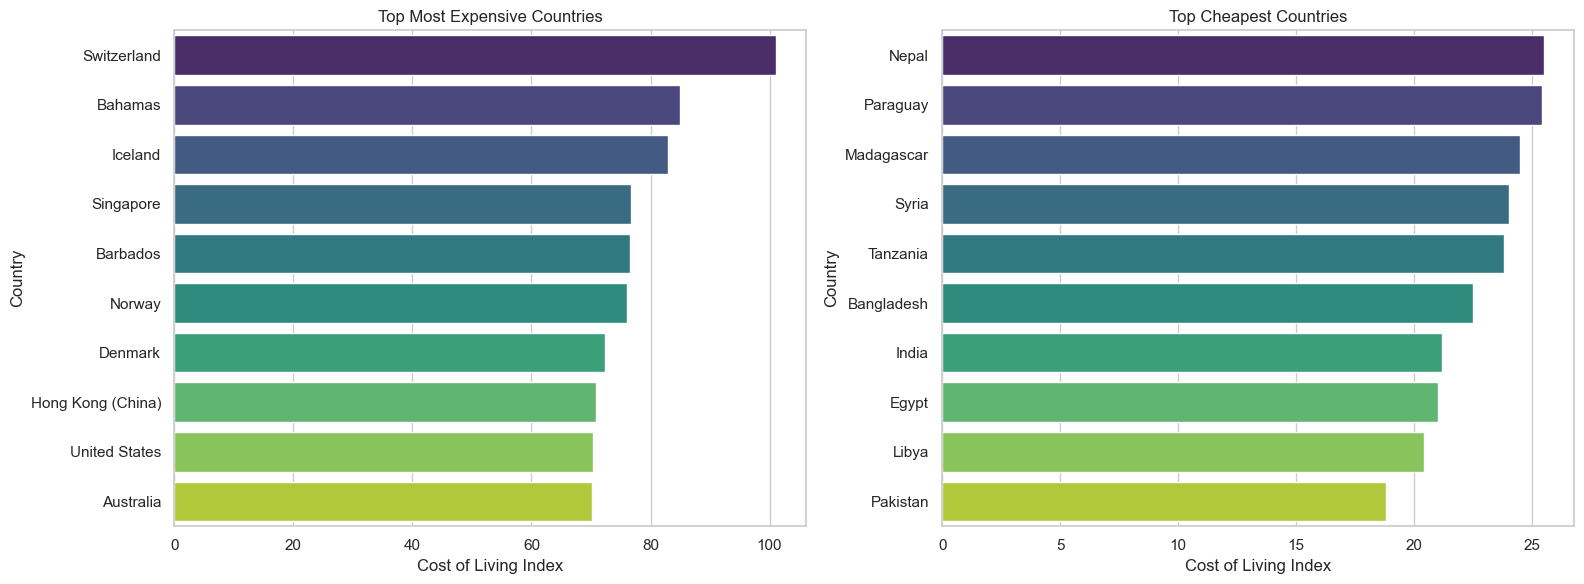

In [11]:
# Figure size for the plot
plt.figure(figsize=(16, 6))

# Plot for the most expensive countries
plt.subplot(1, 2, 1)
sns.barplot(x='Cost of Living Index', y='Country', data=top_10, hue='Country', palette='viridis')
plt.title('Top Most Expensive Countries')
plt.xlabel('Cost of Living Index')
plt.ylabel('Country')

# Plot for the cheapest countries
plt.subplot(1, 2, 2)
sns.barplot(x='Cost of Living Index', y='Country', data=least_10, hue='Country', palette='viridis')
plt.title('Top Cheapest Countries')
plt.xlabel('Cost of Living Index')
plt.ylabel('Country')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### by Groceries Index

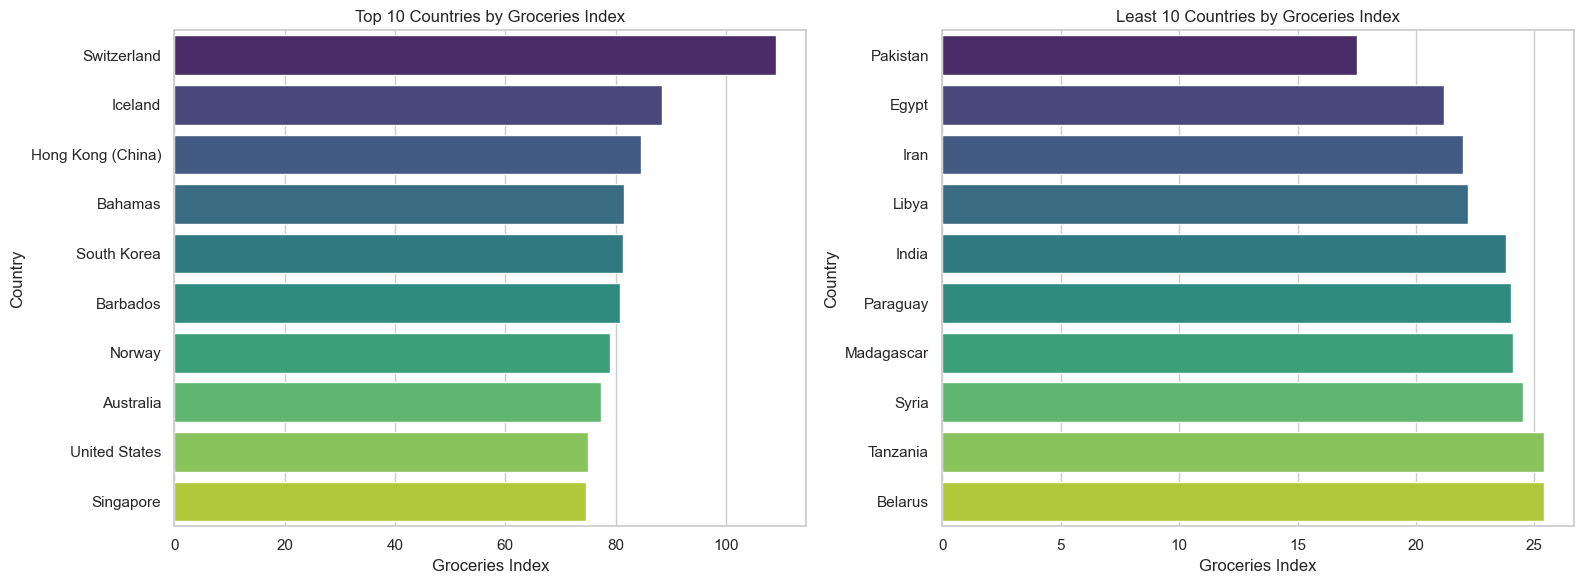

In [12]:
category_index('Groceries Index', data=data)

#### by Restaurant Price Index

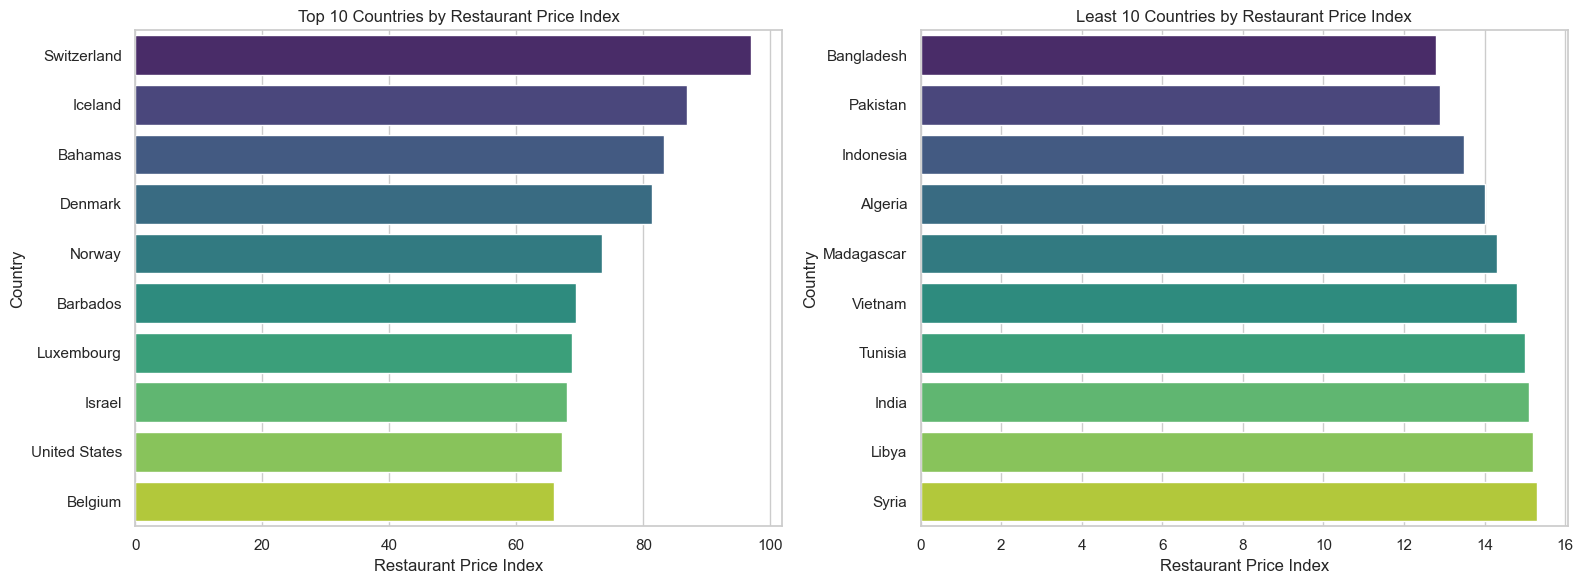

In [13]:
category_index('Restaurant Price Index', data=data)

#### by Rent Index

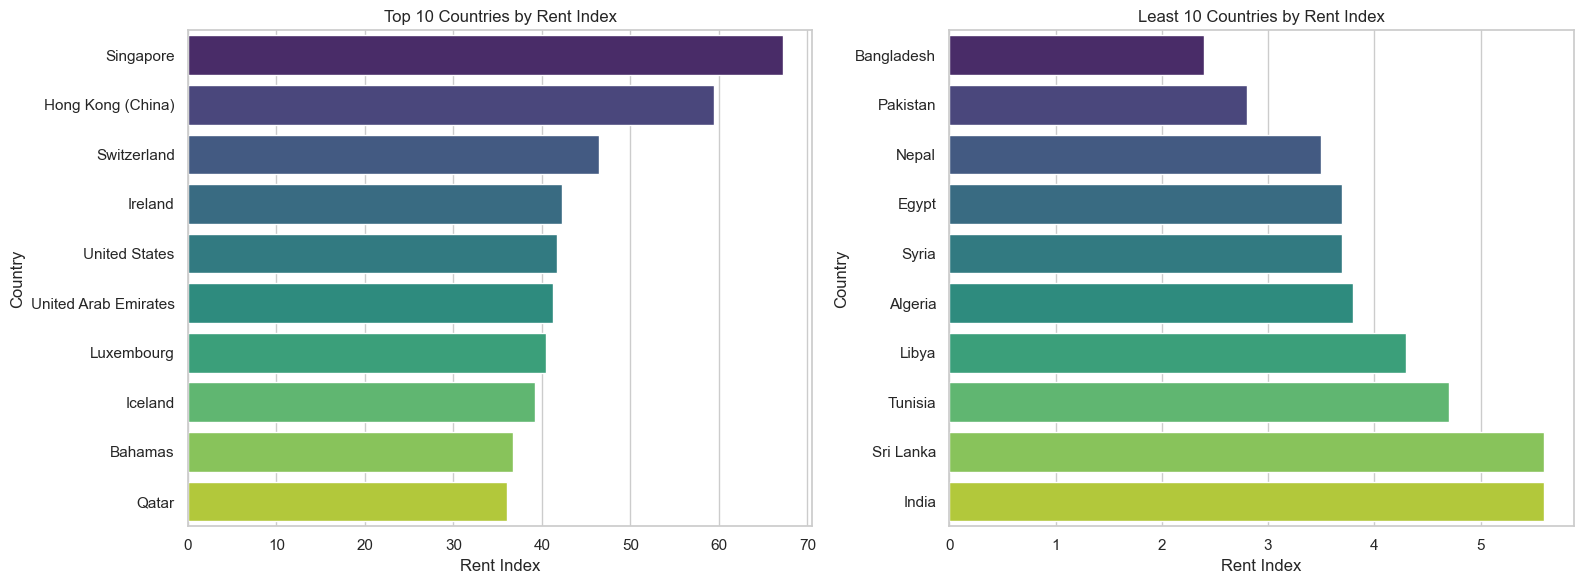

In [14]:
category_index('Rent Index', data=data)

### Correlation Matrix

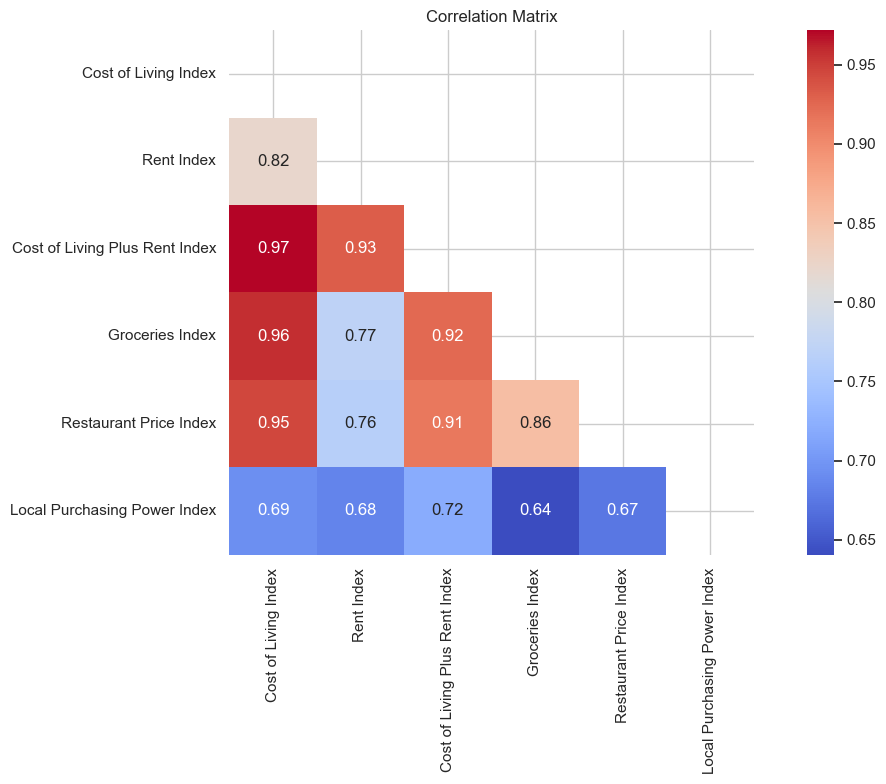

In [15]:
numeric_data = data.drop(columns=['Country', 'Rank'])
corr = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, mask=mask)
plt.title('Correlation Matrix')

# Adjust the layout
plt.tight_layout()
plt.xticks(rotation=90)

# Show the plot
plt.show()